<a href="https://colab.research.google.com/github/vethavarshinii/decision-tree-classifier/blob/main/TASK3_DECISION_TREE_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

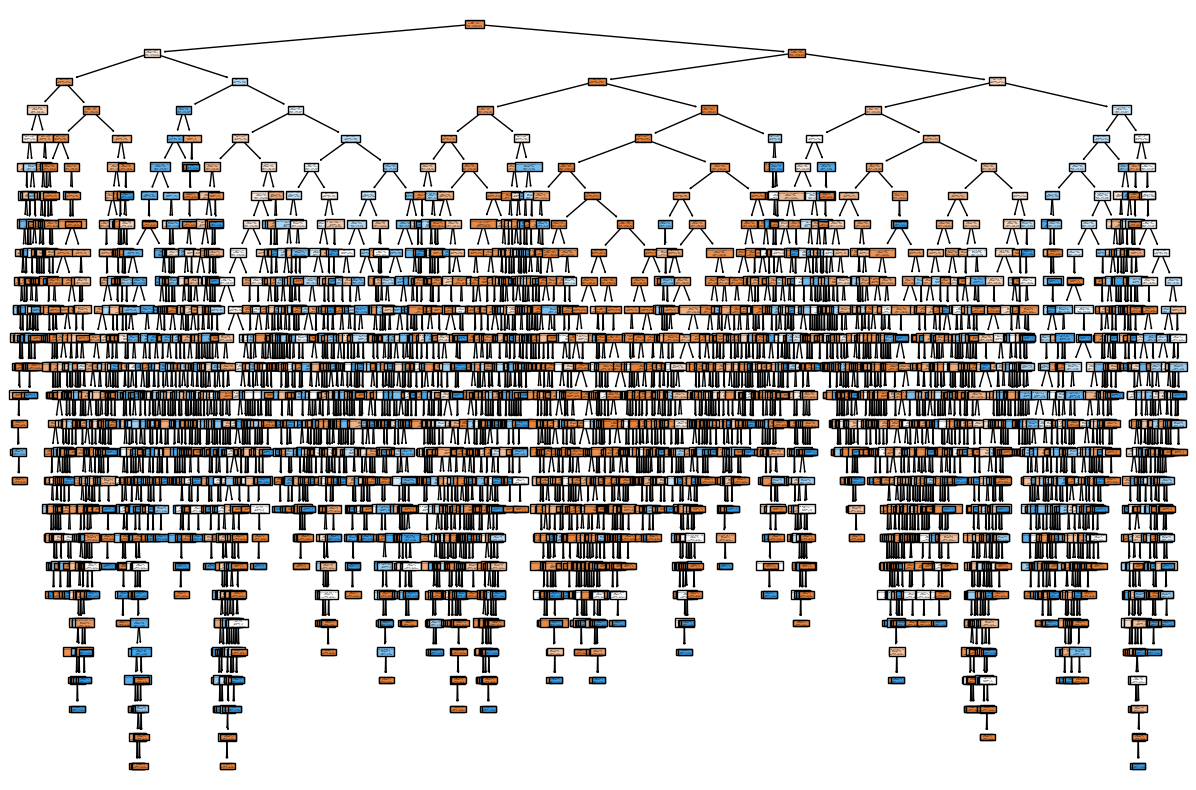

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from zipfile import ZipFile
from io import BytesIO
import requests

# Download and extract the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
response = requests.get(url)
with ZipFile(BytesIO(response.content), 'r') as zip_ref:
    zip_ref.extractall()

# Load the Bank Marketing dataset
csv_file = 'bank-additional/bank-additional-full.csv'
data = pd.read_csv(csv_file, sep=';')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Preprocess the data
# Assume that the target variable is 'y' (whether the customer subscribed to a term deposit)
# You may need to customize this based on the actual structure of your dataset

# Convert categorical variables into numerical representations using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Separate features (X) and target variable (y)
X = data.drop('y_yes', axis=1)  # Exclude the target variable
y = data['y_yes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree (optional)
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.show()